# Бинарная классификация.

## Случай линейно разделимых классов

In [2]:
import numpy as np

file = open('ex2data1.txt', 'r')

first_exam_scores = []
second_exam_scores = []
is_admitted_results = []

for line in file:
    f, s, r = line.split(',')
    first_exam_scores.append(float(f))
    second_exam_scores.append(float(s))
    is_admitted_results.append(int(r))

data = {
    'first_exam_scores': np.array(first_exam_scores),
    'second_exam_scores': np.array(second_exam_scores),
    'is_admitted_results': np.array(is_admitted_results),
}

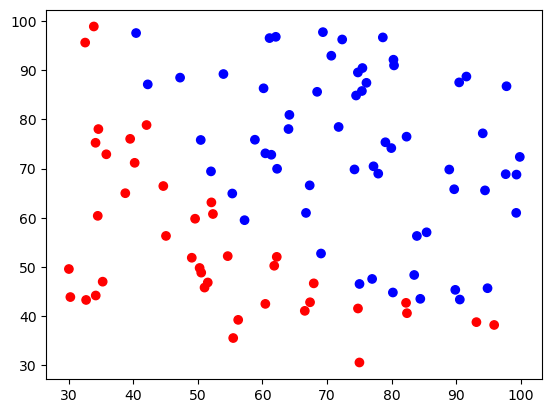

In [3]:
import matplotlib.pyplot as plt

colors = ['red', 'blue']

plt.scatter(
    data['first_exam_scores'],
    data['second_exam_scores'],
    c=[colors[i] for i in data['is_admitted_results']])
plt.show()

In [4]:
m = data['first_exam_scores'].shape[0]
X = np.column_stack((np.ones(m), data['first_exam_scores'], data['second_exam_scores']))
y = data['is_admitted_results']
theta = np.array([0, 0, 0])

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

In [6]:
def costFunction(theta, X, y):
    m = X.shape[0]
    predicts = sigmoid(X @ theta)
    cost = -1 * np.mean(y * np.log(predicts) + (1 - y) * np.log(1 - predicts))
    return cost

In [7]:
test_cost = costFunction(theta, X, y)
test_cost

0.6931471805599453

In [8]:
def gradientFunc(theta, X, y):
    m = X.shape[0]
    predicts = sigmoid(X @ theta)
    primes = (1/m) * (X.T @ (predicts - y))
    return primes

In [9]:
test_primes = gradientFunc(theta, X, y)
test_primes

array([ -0.1       , -12.00921659, -11.26284221])

In [10]:
import scipy.optimize as opt

result = opt.fmin_tnc(
    func = costFunction,
    x0 = theta,
    fprime = gradientFunc,
    args = (X, y))
theta_optimized = result[0]
print(theta_optimized)

[-25.1613184    0.20623159   0.20147148]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631300E-01   7.89087138E-01
    2    5  5.892425204867887E-01   7.39226767E+01
    3    7  4.227823942372852E-01   1.85265614E+01
    4    9  4.072926978103789E-01   1.68671117E+01
    5   11  3.818854817088048E-01   1.07735119E+01
    6   13  3.786234819063554E-01   2.31584917E+01
tnc: stepmx = 1000
    7   16  2.389268257879818E-01   3.00822167E+00
    8   18  2.047203900940446E-01   1.52228440E-01
    9   20  2.046713903972100E-01   6.62496069E-02
   10   22  2.035303159988414E-01   9.30782060E-04
tnc: fscale = 32.7775
   11   24  2.035293518891179E-01   8.07146854E-06
   12   26  2.035251109690735E-01   1.80213083E-04
   13   28  2.034984128882035E-01   5.02991772E-04
   14   30  2.034978399403426E-01   1.00425642E-05
   15   32  2.034977917155916E-01   3.81006314E-06
   16   34  2.034977396667134E-01   1.97307513E-05
   17   36  2.034977015894756E-01   2.17023564E-13


Test predict = 0.7762906215877046


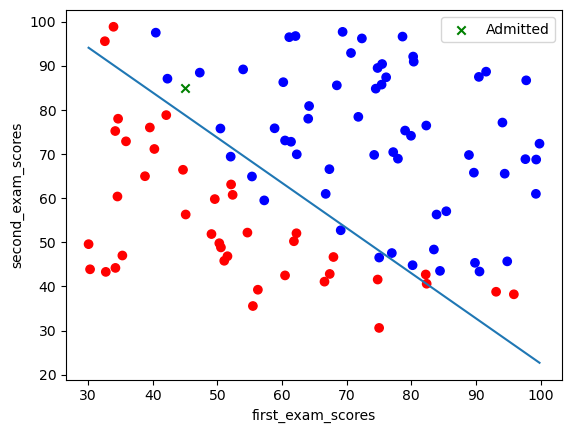

In [11]:
plt.scatter(
    data['first_exam_scores'],
    data['second_exam_scores'],
    c=[colors[i] for i in data['is_admitted_results']])

plt.xlabel('first_exam_scores')
plt.ylabel('second_exam_scores')

plot_x = np.array([min(X[:, 1]), max(X[:, 1])])
plot_y = (-1.0 / theta_optimized[2]) * (theta_optimized[1] * plot_x + theta_optimized[0])
plt.plot(plot_x, plot_y)

test_x = np.array([1, 45, 85])
test_predict = sigmoid(test_x @ theta_optimized)
print('Test predict =', test_predict)

plt.scatter(test_x[1], test_x[2], c='green', marker='x', label='Admitted')
plt.legend()

## Случай не разделимых линейно классов

In [12]:
import pandas as pd

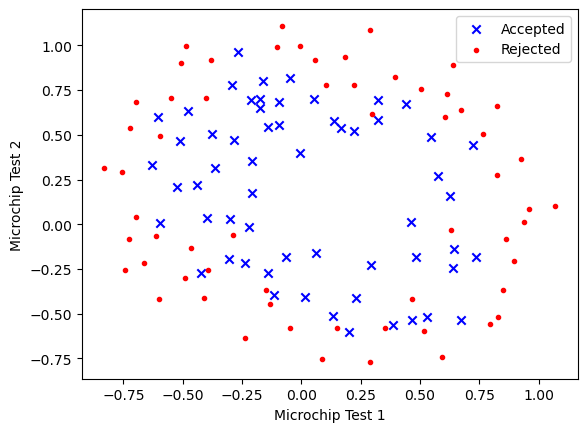

In [13]:
data2 = pd.read_csv('ex2data2.txt', names=['first_test', 'second_test', 'status'])
data2.insert(0, 'ones', 1)
X = data2[['ones', 'first_test', 'second_test']].values
y = data2['status'].values

accepted_data = data2[data2['status'] == 1]
rejected_data = data2[data2['status'] == 0]

plt.scatter(accepted_data['first_test'], accepted_data['second_test'], c='blue', marker='x', label='Accepted')
plt.scatter(rejected_data['first_test'], rejected_data['second_test'], c='red', marker='.', label='Rejected')

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)

In [15]:
x_poly = poly.fit_transform(X[:, 1:])
theta = np.zeros(28)

In [16]:
def costFunctionR(theta, X, y, lam):
    m = X.shape[0]
    predicts = sigmoid(np.dot(X, theta))
    reg = (lam / (2 * m)) * np.sum(theta[1:] ** 2)
    cost = -1 * np.mean(y * np.log(predicts) + (1 - y) * np.log(1 - predicts)) + reg
    return cost

In [17]:
def gradientFuncR(theta, X, y, lam):
    m = X.shape[0]
    predicts = sigmoid(X @ theta)

    reg = (lam / m) * theta
    reg[0] = 0

    primes = (1/m) * (X.T @ (predicts - y)) + reg
    return primes

In [18]:
test_gradientFuncR = gradientFuncR(theta, x_poly, y, 1.0)
test_gradientFuncR

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [19]:
test_costFunctionR = costFunctionR(theta, x_poly, y, 1.0)
test_costFunctionR

0.6931471805599454

In [20]:
result = opt.fmin_tnc(
    func = costFunctionR,
    x0 = theta,
    fprime = gradientFuncR,
    args = (x_poly, y, 1.0))
theta_optimized = result[0]
print(theta_optimized)

[ 1.2742205   0.62478652  1.18590384 -2.02173837 -0.91708238 -1.41319221
  0.12444391 -0.36770506 -0.36458177 -0.18067773 -1.46506526 -0.06288686
 -0.61999791 -0.27174425 -1.20129299 -0.23663777 -0.20901431 -0.05490405
 -0.27804403 -0.29276908 -0.46790736 -1.04396489  0.02082853 -0.29638538
  0.00961564 -0.32917183 -0.13804207 -0.93550785]


  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    6  4.891097614775618E-01   9.47479199E-04
tnc: fscale = 32.4874
    2   11  4.642000182070243E-01   1.47917091E-05
    3   14  4.622487238532849E-01   3.98126583E-07
tnc: fscale = 1584.85
    3   56  4.622487238532849E-01   3.98126583E-07
tnc: Linear search failed


In [21]:
def draw_plot(theta_optimized, reg):    
    plt.scatter(accepted_data['first_test'], accepted_data['second_test'], c = 'blue', marker = '+', label = 'Accepted')
    plt.scatter(rejected_data['first_test'], rejected_data['second_test'], c = 'red', label = 'Rejected')
    
    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    z = np.zeros((len(u),len(v)))

    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            z[i,j] = poly.transform(np.array([[ui, vj]])).dot(theta_optimized)[0]
    
    plt.contour(u,v,z, levels = [0], linewidths = 3, colors = 'green')
    plt.legend()
    plt.title(f'lambda: {reg}')
    plt.show()

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
tnc: stepmx = 1000
    1    7  3.769319797824127E-01   2.82192478E-03
    2   11  3.576205094854317E-01   1.61503933E-04
tnc: fscale = 78.688
    3   20  3.263734487538149E-01   3.16735533E-05
    4   23  3.213409302738335E-01   1.05329936E-04
    5   37  3.026894083004540E-01   1.30425450E-04
    6   41  2.996446458084130E-01   2.99426684E-06
    7   53  2.921376174644622E-01   8.66439250E-06
    8   66  2.867737154845003E-01   1.11366854E-05
    9   71  2.854322652292652E-01   3.05954272E-07
tnc: fscale = 1807.89
   10   80  2.838455734402683E-01   7.06473137E-07
   11   94  2.803803874681292E-01   4.45209358E-06
   12  106  2.772893501967602E-01   2.04090860E-06
   13  121  2.745277522456256E-01   8.01900708E-07
   14  134  2.725608460181292E-01   4.46438897E-06
   15  149  2.705231033957196E-01   1.33283650E-06
   16  156  2.702893018410212E-01   6.81212036E-08
   17  168  2.698476413239968E

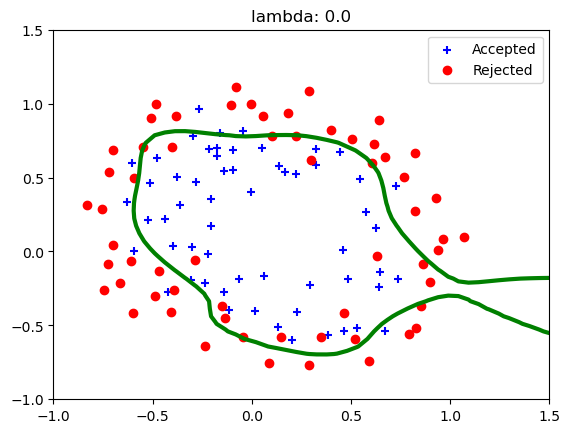

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    6  4.891097614775618E-01   9.47479199E-04
tnc: fscale = 32.4874
    2   11  4.642000182070243E-01   1.47917091E-05
    3   14  4.622487238532849E-01   3.98126583E-07
tnc: fscale = 1584.85
    3   56  4.622487238532849E-01   3.98126583E-07
tnc: Linear search failed


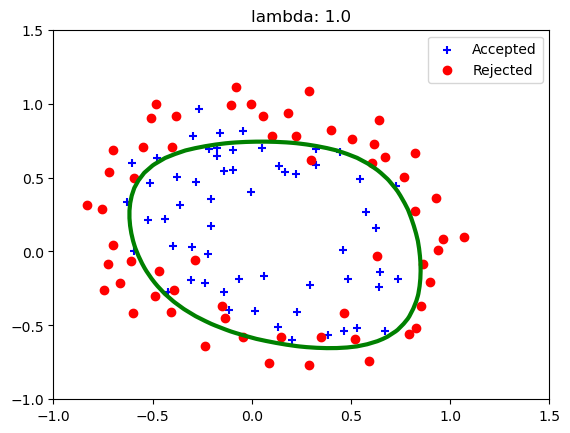

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    5  5.817034040508546E-01   1.11806057E-04
tnc: fscale = 94.573
    2    9  5.774722221157088E-01   6.21520123E-07
    3   12  5.773300817202700E-01   2.70931801E-08
tnc: fscale = 6075.33
    4   16  5.772933260608346E-01   1.81137588E-10
    5   19  5.772918935065301E-01   5.35777787E-11
tnc: fscale = 136618
    5   45  5.772918935065301E-01   5.35777787E-11
tnc: Linear search failed


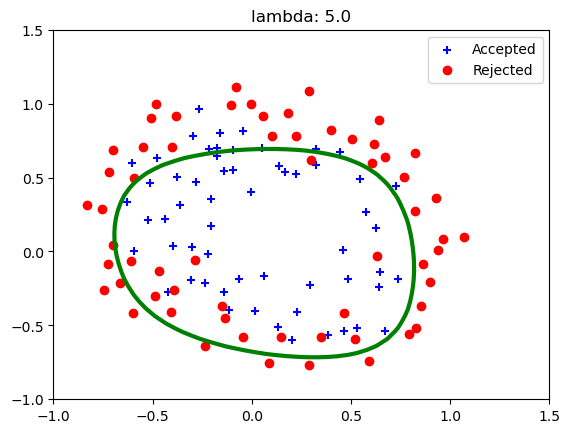

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    4  6.411826718723203E-01   1.74795598E-04
tnc: fscale = 75.6371
    2    7  6.405659067137497E-01   5.71370112E-06
    3   10  6.398880404758204E-01   3.18213733E-07
tnc: fscale = 1772.72
    4   13  6.398608214305012E-01   4.02768611E-09
    5   22  6.398554897939546E-01   1.73222994E-10
tnc: fscale = 75979.6
    6   25  6.398547073319475E-01   2.00286610E-12
    6   49  6.398547073319475E-01   2.00286610E-12
tnc: Linear search failed


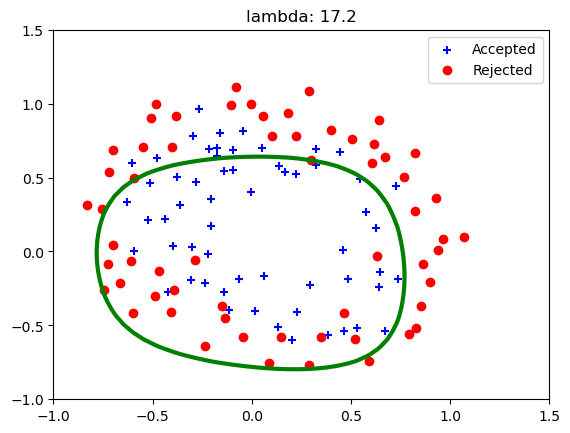

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    4  6.806355954659379E-01   3.38580630E-05
tnc: fscale = 171.858
    2    8  6.803789078889151E-01   1.72447407E-09
tnc: fscale = 24080.8
    2   34  6.803789078889151E-01   1.72447407E-09
tnc: Linear search failed


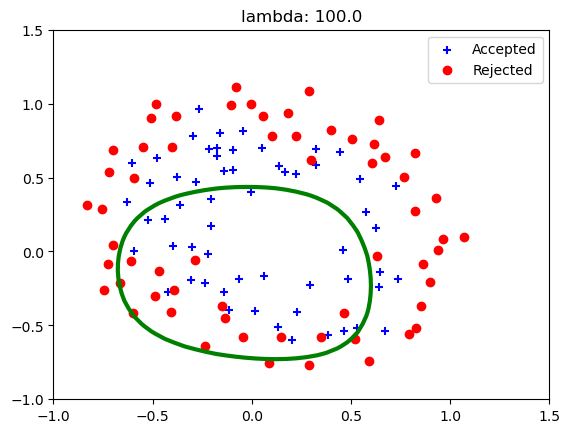

In [22]:
regs = [0.0, 1.0, 5.0, 17.2, 100.0]

for r in regs:
    result = opt.fmin_tnc(
        func = costFunctionR,
        x0 = theta,
        fprime = gradientFuncR,
        args = (x_poly, y, r))
    theta_optimized = result[0]
    draw_plot(theta_optimized, r)

## Использование логистической регрессии для решения задачи множественной классификации – распознавания рукописных цифр от 0 до 9

In [23]:
data3 = pd.read_csv('ex2data3.txt', header=None)

In [24]:
X = data3.iloc[:, :-1].values
y = data3.iloc[:, -1].values
X = np.insert(X, 0, 1, axis=1)
print(X.shape)
print(y.shape)

(5000, 401)
(5000,)


In [25]:
m, n = X.shape

all_theta = np.zeros((10, n))
print(all_theta.shape)

lam = 0.1

for i in range(10):
    all_theta[i] = opt.fmin_tnc(
        func=costFunctionR,
        x0=all_theta[i].T,
        fprime=gradientFuncR,
        args=(X, (y==i)*1, lam))[0]

(10, 401)


  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   2.88474253E+00
    1    6  7.365845243349049E-02   4.01935700E-03
    2   17  3.238391192324337E-02   1.23914933E-03
tnc: fscale = 28.4078
    3   22  2.183532104489759E-02   7.91610801E-05
    4   25  1.911935584001230E-02   4.73416144E-05
    5   36  1.031576773120296E-02   9.03979991E-06
    6   44  7.560988768553341E-03   1.60208233E-06
tnc: fscale = 790.055
    7   52  6.502977101562449E-03   3.62084615E-06
    8   60  5.542740471916852E-03   2.62681640E-06
    9   67  5.016395944155828E-03   5.61465467E-08
   10   70  4.915193779768992E-03   6.80012960E-08
   11   79  4.850937973836457E-03   1.92179307E-08
   12   88  4.796387511334602E-03   2.08897179E-08
   12  138  4.796387511334602E-03   2.08897179E-08
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   3.58944746E+00
    1    5  6.823208300845800E-02   6.30843829E-03
    2   14  3.709615259982430E-0

In [26]:
h = sigmoid(X @ all_theta.T)
h_argmax = np.argmax(h, axis=1)
h, h_argmax

(array([[9.99727079e-01, 6.52481956e-17, 7.91352483e-05, ...,
         3.44217259e-09, 9.65991660e-06, 1.54830514e-03],
        [9.99980333e-01, 1.54820852e-13, 1.44460539e-06, ...,
         1.61399454e-08, 3.49822767e-07, 1.33711295e-05],
        [9.99980715e-01, 3.30056850e-16, 3.38460155e-04, ...,
         5.37545784e-08, 4.54001635e-03, 5.86576561e-04],
        ...,
        [8.75551877e-11, 7.24737605e-03, 9.09198190e-04, ...,
         7.75549710e-06, 9.60935686e-04, 8.86204538e-01],
        [8.49659549e-09, 1.27292707e-12, 2.74884723e-10, ...,
         2.31744116e-04, 3.54222295e-02, 8.66457503e-01],
        [4.65423419e-03, 7.14883937e-19, 2.06005417e-07, ...,
         2.40053193e-01, 8.39472211e-03, 2.07161310e-01]]),
 array([0, 0, 0, ..., 9, 9, 7]))

In [27]:
print("Precision:" + str(len(np.where(y == h_argmax)[0]) / len(y)))


Precision:0.9646
